# 1.) Preprocess your data into scaled input variables and an output variable


In [20]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/google colab/CLV.csv")


In [4]:
df.head(3)

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0


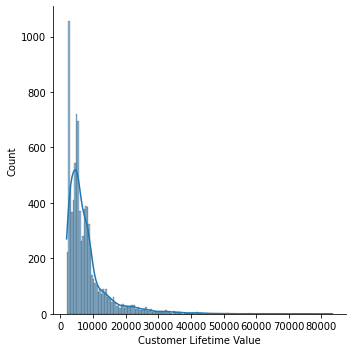

In [21]:
sns.displot(data=df,x='Customer Lifetime Value',kde=True)

In [5]:

df.shape

(9134, 18)

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      9134 non-null   int64  
 1   Customer Lifetime Value         9134 non-null   float64
 2   Income                          9134 non-null   int64  
 3   Number of Policies              9134 non-null   int64  
 4   Total Claim Amount              9134 non-null   float64
 5   Months Since Last Claim         9134 non-null   int64  
 6   Vehicle Size_Large              9134 non-null   int64  
 7   Vehicle Size_Medsize            9134 non-null   int64  
 8   Gender_M                        9134 non-null   int64  
 9   EmploymentStatus_Employed       9134 non-null   int64  
 10  EmploymentStatus_Medical Leave  9134 non-null   int64  
 11  EmploymentStatus_Retired        9134 non-null   int64  
 12  EmploymentStatus_Unemployed     91

In [8]:
X = df.drop('Customer Lifetime Value', axis =1)
y = df['Customer Lifetime Value']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=101)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [13]:
# ML packages
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [14]:
clf = MLPRegressor()

In [15]:
params = {'hidden_layer_sizes': [(10,),(5,20,), (10,50,), (10,100,10), 
                                (50,100,25,5,)],
         'activation': ['relu', 'tanh', 'logistic'],
         'alpha': [0.0001, 0.001, 0.01]}

# 3.) Train a model with the optimal solution from GridSearch

In [16]:
grid = GridSearchCV(clf, params, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train_scaled,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(10,), (5, 20), (10, 50),
                                                (10, 100, 10),
                                                (50, 100, 25, 5)]},
             scoring='neg_root_mean_squared_error')

In [22]:
print('Best parameters:', grid.best_params_)
print('Best score:', grid.best_score_)

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 25, 5)}
Best score: -6437.800557377172


In [27]:
round(abs(grid.best_score_)/df['Customer Lifetime Value'].mean(),3)

0.804

# 4.) What are the in-sample and out of sample MSEs

In [28]:
# in-sample error
y_pred = grid.predict(X_train_scaled)
mean_squared_error(y_train, y_pred)

42112628.95427192

In [29]:
# out-sample error
y_pred = grid.predict(X_test_scaled)
mean_squared_error(y_test, y_pred)

41357087.558835946

# 5.) Build a Keras with the architecture defined by GridSearchCV

In [30]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [31]:
model = Sequential()

model.add(Dense(27, input_dim=X_train_scaled.shape[1], activation = 'relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation = 'softmax'))

In [32]:
model.compile(loss='mse', optimizer = Adam(lr=0.0001))
model.fit(X_train_scaled, y_train, batch_size=32, epochs=100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 112590552.0000
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 112590528.0000
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 112590520.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 112590592.0000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 112590568.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 112590592.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 112590568.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 112590592.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 112590520.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 112590568.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 112590560.0000
Epoch 12

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [33]:
from tensorflow.keras.utils import plot_model

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 27)                486       
                                                                 
 dense_1 (Dense)             (None, 50)                1400      
                                                                 
 dense_2 (Dense)             (None, 100)               5100      
                                                                 
 dense_3 (Dense)             (None, 25)                2525      
                                                                 
 dense_4 (Dense)             (None, 5)                 130       
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 9,647
Trainable params: 9,647
Non-trainabl

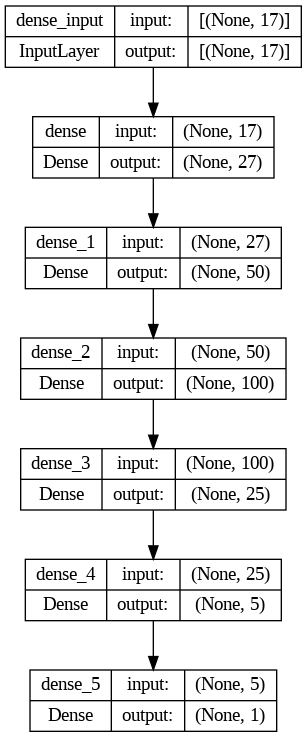

In [35]:
plot_model(model, show_shapes = True)

In [36]:
pip install ann-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=53889ccfaf4257f5692c63f94a3dfe9eeb2393aa66ee40e616d38a8a0316a587
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann-visualizer


In [37]:
from ann_visualizer.visualize import ann_viz

In [38]:
ann_viz(model, title = "MLP NN Viz",filename="/content/mlp_model")

In [39]:
pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from pdf2image import convert_from_path

In [41]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 1s (326 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 128126 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.86.1-0ubuntu1.1_amd64.deb ...
Unpacking poppler-utils (0.86.1-0ubuntu1.1) ...
Setting up poppler-utils (0.86.1-0ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...


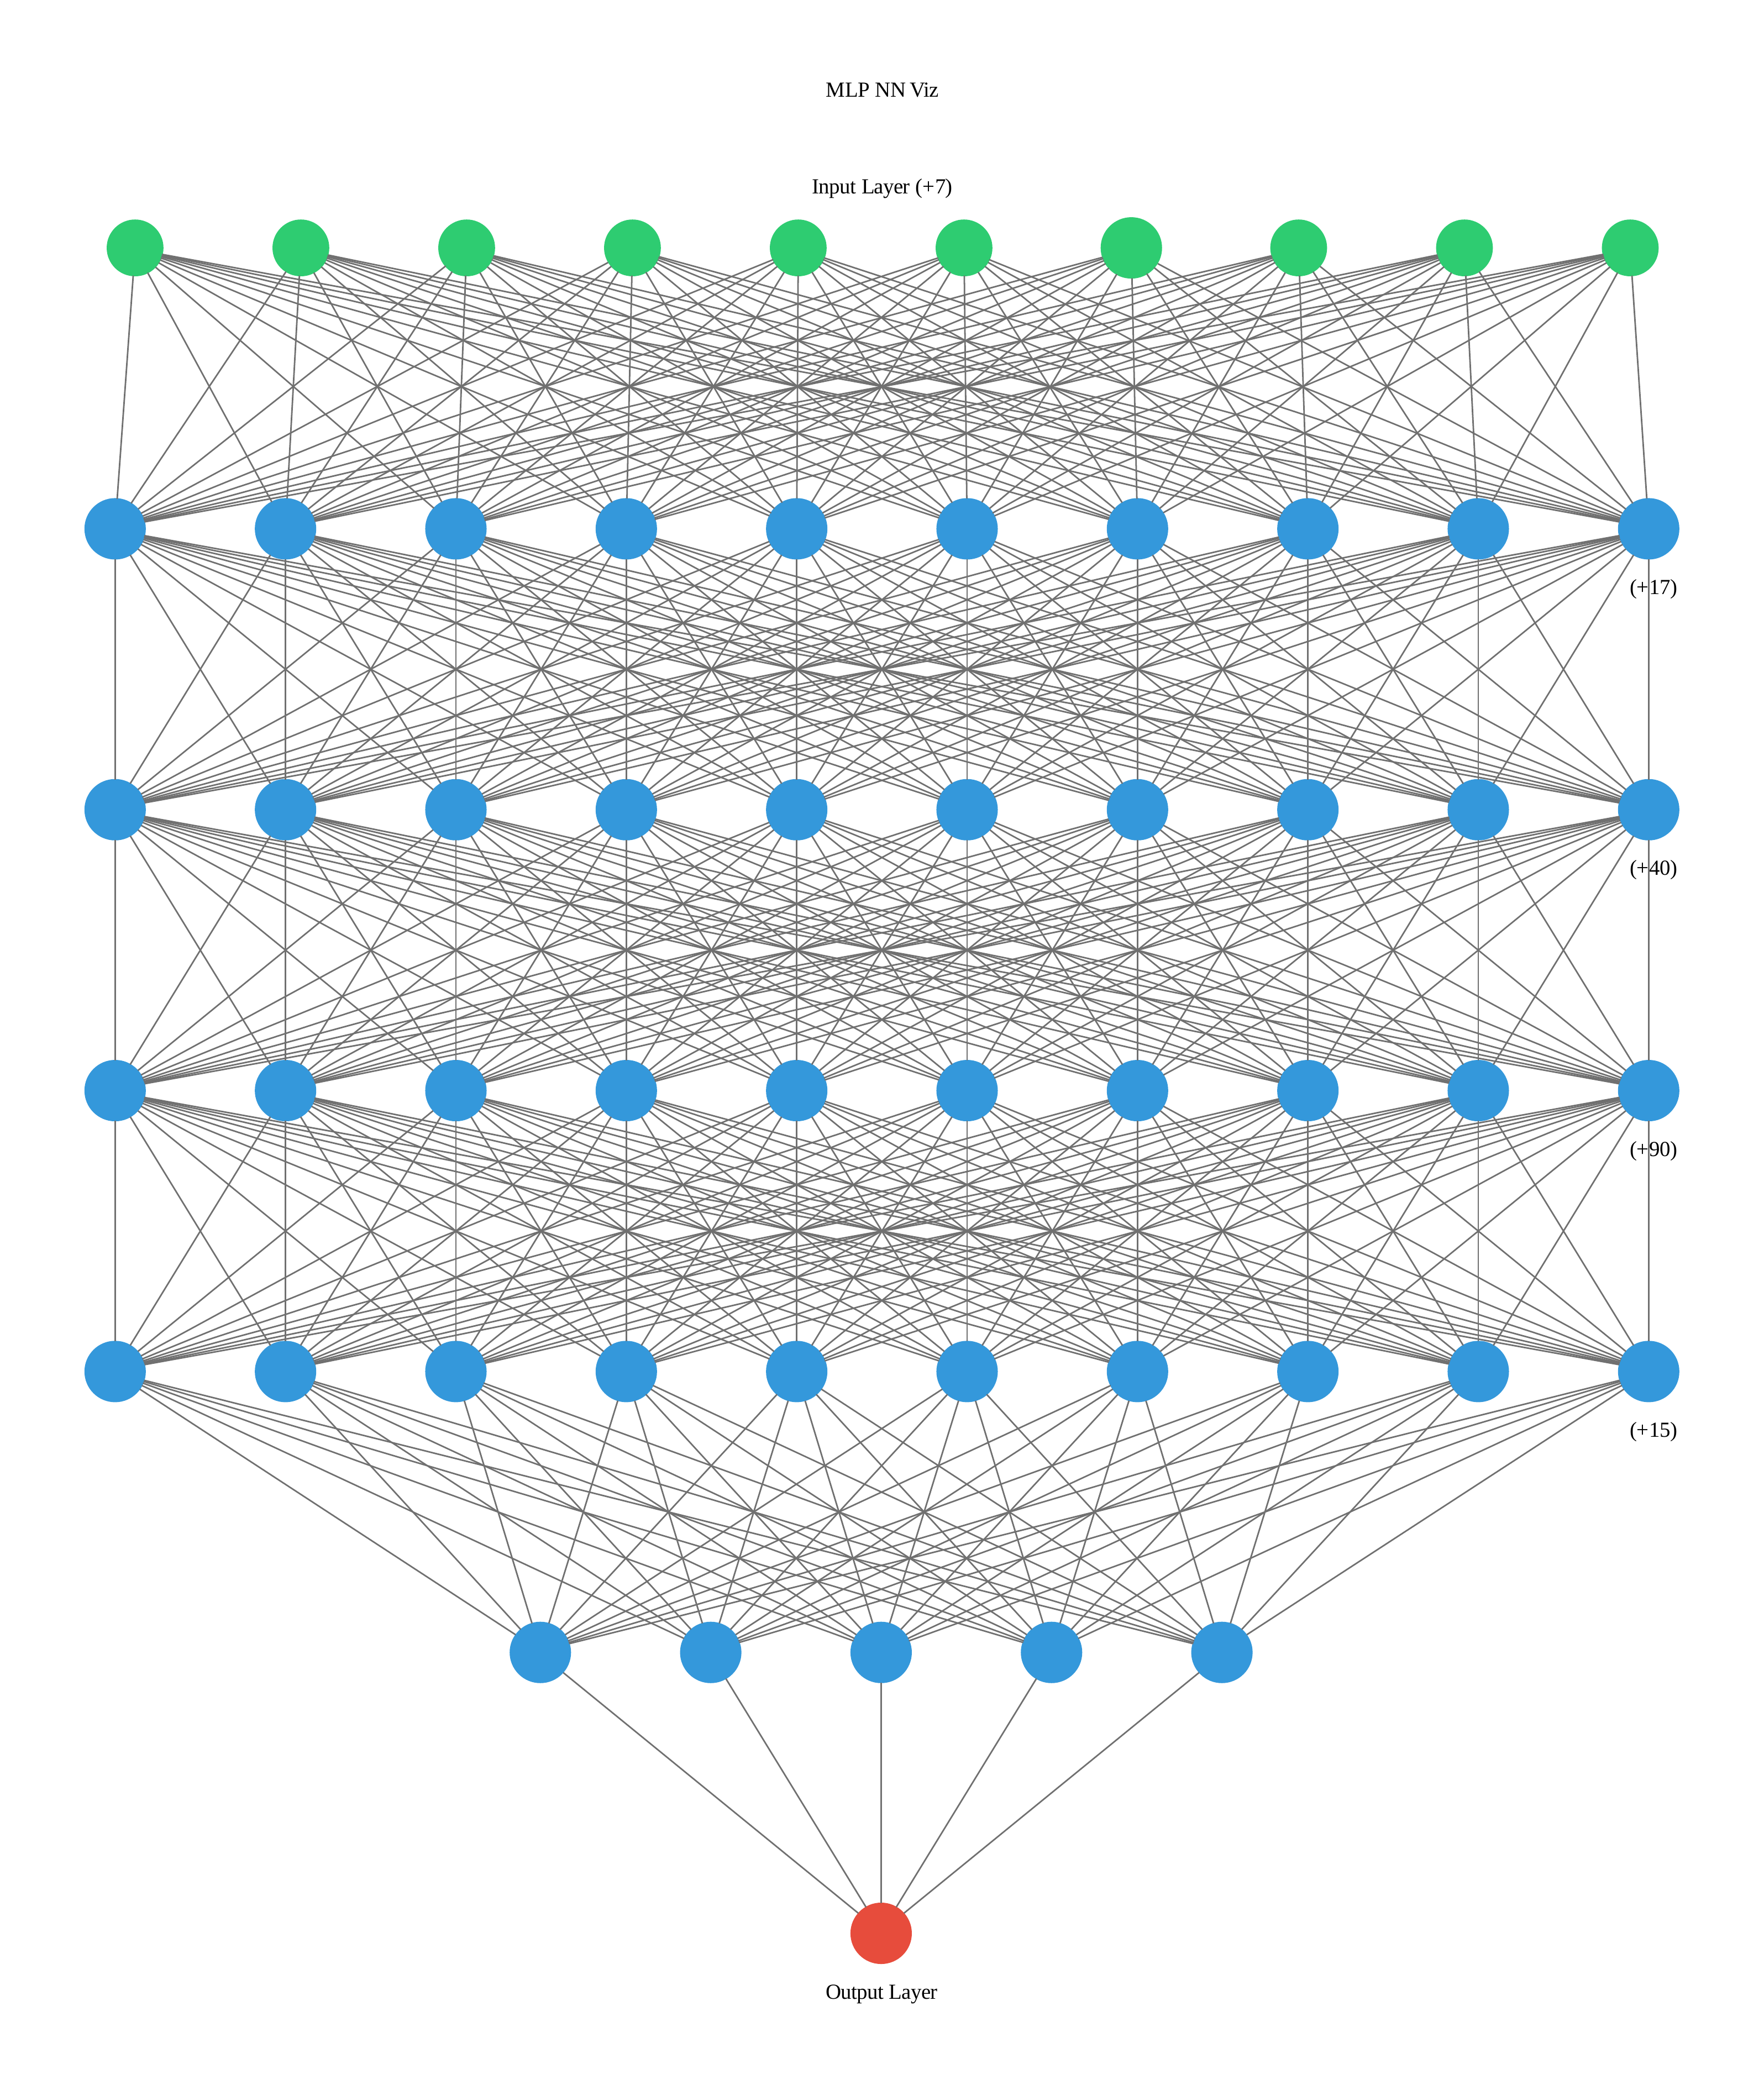

In [42]:
images = convert_from_path("/content/mlp_model.pdf")
images[0]